In [7]:
import pandas as pd
import numpy as np

In [8]:
fake=pd.read_csv('train.csv')

In [9]:
fake.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [10]:
fake=fake.drop(['id'],axis=1)
fake=fake.dropna()
fake=fake.drop(['author'],axis=1)
fake=fake.dropna()

In [11]:
def data_qualityCheck():
    fake.isnull().sum()
    fake.info()
    print("Verified...")
data_qualityCheck()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18285 entries, 0 to 20799
Data columns (total 3 columns):
title    18285 non-null object
text     18285 non-null object
label    18285 non-null int64
dtypes: int64(1), object(2)
memory usage: 571.4+ KB
Verified...


In [12]:
fake.head()

,title,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1


In [13]:
x=fake.iloc[:,:-1].values
y=fake.iloc[:,-1].values

In [14]:
x[0]

array(['House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It',
       'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking member

In [15]:
y[0]

1

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000)
mat_body=cv.fit_transform(x[:,1]).todense()

In [17]:
mat_body

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 1, 1, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 3, 0, ..., 0, 0, 0]])

In [18]:
cv_head=CountVectorizer(max_features=5000)
mat_head=cv_head.fit_transform(x[:,0]).todense()

In [19]:
mat_head

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [20]:
X_mat=np.hstack((mat_head,mat_body))

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_mat,y,test_size=0.2,random_state=0)

In [22]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1953,   87],
       [  82, 1535]])

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9537872573147389

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fda8dc8cbe0>)

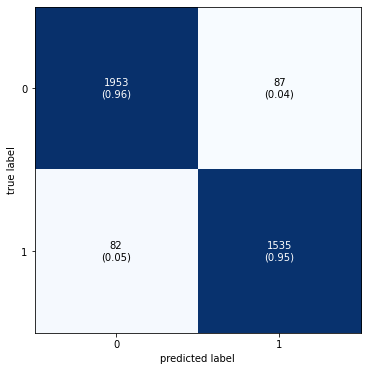

In [43]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(mat,figsize=(6,6),show_normed=True)